## PREP

In [5]:
import torch
import glob
from IPython import display
import numpy as np
import seaborn as sns
import os

In [6]:
# Automatic Loading Based on Latest File Edited
CP_latest = True
CStructure_latest = True
feat_ext = True
fine_tune = True

In [26]:
def newest(path):
    '''Got from the internet
    Take the latest file added to the directory within a directory and returns the path
    path: path to directory (str)
    '''
    files = os.listdir(path)
    print(files)
    paths = [os.path.join(path, basename) for basename in files]
    return max(paths, key=os.path.getctime)

In [8]:
def specific_files(path):
    '''Selecting specific models based on the name in the file and then selecting the latest one'''
    files = glob.glob(path)
    paths = [os.path.join(path, basename) for basename in files]
    return max(paths, key=os.path.getctime)

In [29]:
def display_loss(path, automatic):
    if automatic == True:
        last_edited_file = specific_files(path)
        print(last_edited_file)
        img = display.Image(filename = str(last_edited_file))
    else:
        x = input('Input path Loss: ')
        img = display.Image(x)
    return img

def display_acc(path, automatic):
    if automatic == True:
        last_edited_file = specific_files(path)
    #last_edited_file = newest(path)
        print(last_edited_file)
        img = display.Image(last_edited_file)
    else:
        x = input('Input path for Accuracy: ')
        img = display.Image(x)
    return img

def load_state(path,automatic):
    if automatic == True:
        last_edited_file = newest(path)
        print(last_edited_file)
        state = torch.load(last_edited_file)
    else:
        x = input('Input path for CP model: ')
        state = torch.load(x)
    return state

def classif_report(path, automatic):
    if automatic == True:
        last_edited_file = newest(path)
        print(last_edited_file)
        with open(last_edited_file, 'r') as f2:
            data = f2.read()
            print(data)
    else:
        x = input('Input path for Classification Report: ')
        with open(x, 'r') as f2:
            data = f2.read()
            print(data)

def conf_matrix(path, automatic):
    if automatic == True:
        last_edited_file = newest(path)
        print(last_edited_file)
        cf_matrix = np.load(last_edited_file)
    else:
        x = input('Input path for confusion matrix: ')
        cf_matrix = np.load(x)
    #cf_matrix = np.load('/home/jovyan/Tomics-CP-Chem-MoA/Compound_structure_based_models/saved_confusion_matrices/12_12_2022-13:19:41_confusion_matrix.npy')
    cf_matrix = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]
    '''group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']'''
    #group_counts = ['{0:0.0f}'.format(value) for value in
                #cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n' for v1 in group_percentages]
    labels = np.asarray(labels).reshape(10, 10)
    print(sns.heatmap(cf_matrix, annot = True, fmt='.2f').set(title = 'Normalized Chemical Structure Confusion Matrix'))


# CP MODEL

/home/jovyan/Tomics-CP-Chem-MoA/02_CP_Models/saved_images/loss_train_val_20_12_2022-12:39:50.png


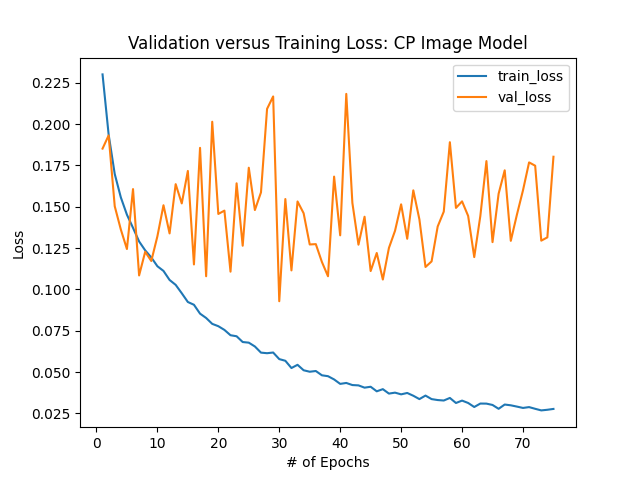

In [57]:
path = '/home/jovyan/Tomics-CP-Chem-MoA/02_CP_Models/saved_images/loss*'
display_loss(path, CP_latest)


/home/jovyan/Tomics-CP-Chem-MoA/02_CP_Models/saved_images/acc_train_val.png


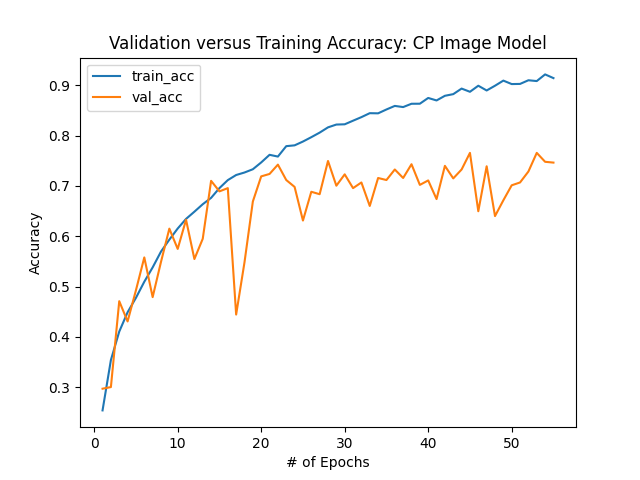

In [90]:
path = '/home/jovyan/Tomics-CP-Chem-MoA/02_CP_Models/saved_images/acc*'
display_acc(path, CP_latest)

In [58]:
path= '/home/jovyan/Tomics-CP-Chem-MoA/02_CP_Models/saved_models'
state = load_state(path, CP_latest)
b = state['valid_loss']
b

['CP_least_loss_model']
/home/jovyan/Tomics-CP-Chem-MoA/02_CP_Models/saved_models/CP_least_loss_model


9.655587707646191

In [59]:
path = '/home/jovyan/Tomics-CP-Chem-MoA/02_CP_Models/saved_classification_reports'
classif_report(path, CP_latest)

['13_12_2022-10:59:39_classif_report.txt', '13_12_2022-20:24:51_classif_report.txt', '14_12_2022-00:35:17_classif_report.txt', '14_12_2022-11:23:44_classif_report.txt', '14_12_2022-11:31:00_classif_report.txt', '14_12_2022-15:37:41_classif_report.txt', '14_12_2022-15:46:48_classif_report.txt', '14_12_2022-16:38:05_classif_report.txt', '19_12_2022-09:21:00_classif_report.txt', '20_12_2022-12:39:50_classif_report.txt']
/home/jovyan/Tomics-CP-Chem-MoA/02_CP_Models/saved_classification_reports/20_12_2022-12:39:50_classif_report.txt
              precision    recall  f1-score   support

           0       0.52      0.90      0.66        62
           1       0.94      0.91      0.93       112
           2       0.37      0.34      0.36       117
           3       0.59      0.56      0.58       114
           4       0.90      0.80      0.85       244
           5       0.92      0.74      0.82       201
           6       0.77      0.88      0.82        94
           7       0.68      0.66

['13_12_2022-10:59:39_confusion_matrix.npy', '13_12_2022-20:24:51_confusion_matrix.npy', '14_12_2022-00:35:17_confusion_matrix.npy', '14_12_2022-11:23:44_confusion_matrix.npy', '14_12_2022-11:31:00_confusion_matrix.npy', '14_12_2022-15:37:41_confusion_matrix.npy', '14_12_2022-15:46:48_confusion_matrix.npy', '14_12_2022-16:38:05_confusion_matrix.npy', '19_12_2022-09:21:00_confusion_matrix.npy', '20_12_2022-12:39:50_confusion_matrix.npy']
/home/jovyan/Tomics-CP-Chem-MoA/02_CP_Models/saved_confusion_matrices/20_12_2022-12:39:50_confusion_matrix.npy
[Text(0.5, 1.0, 'Normalized Chemical Structure Confusion Matrix')]


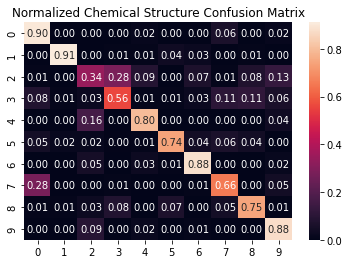

In [60]:
path = '/home/jovyan/Tomics-CP-Chem-MoA/02_CP_Models/saved_confusion_matrices'
conf_matrix(path, CP_latest)

# CStructure 

/home/jovyan/Tomics-CP-Chem-MoA/01_CStructure_Models/saved_images/loss_train_val_20_12_2022-10:57:57.png


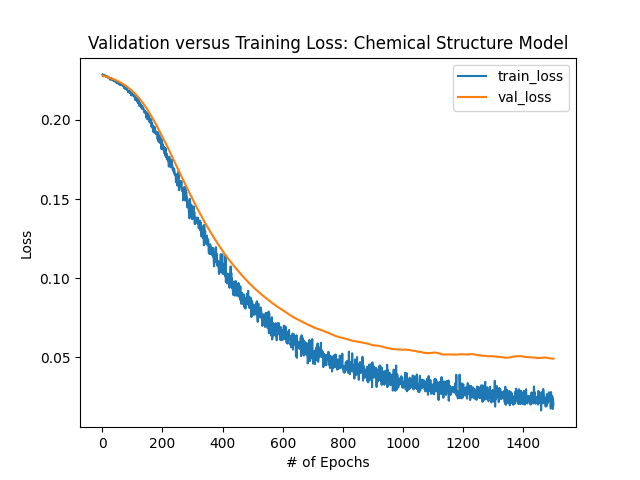

In [52]:
path = '/home/jovyan/Tomics-CP-Chem-MoA/01_CStructure_Models/saved_images/loss*'
display_loss(path, CStructure_latest)

/home/jovyan/Tomics-CP-Chem-MoA/01_CStructure_Models/saved_images/acc_train_val_20_12_2022-10:57:57.png


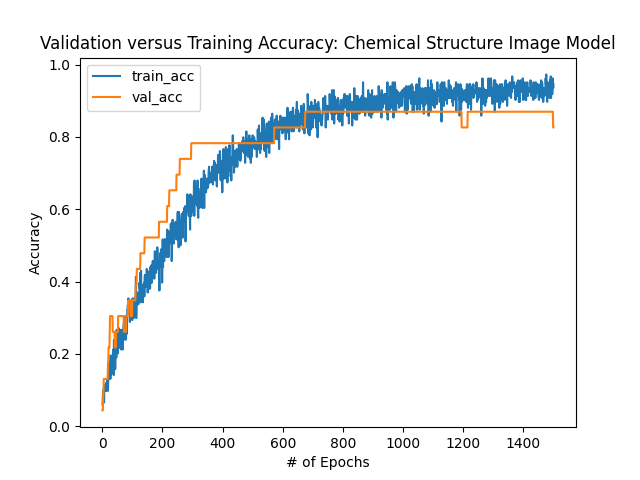

In [53]:
path = '/home/jovyan/Tomics-CP-Chem-MoA/01_CStructure_Models/saved_images/acc*'
display_acc(path, CP_latest)

In [54]:
path= '/home/jovyan/Tomics-CP-Chem-MoA/01_CStructure_Models/saved_models/'
state = load_state(path, CP_latest)
b = state['time_create']
b

['ChemStruc_least_loss_model', 'ChemStruc_Least_Loss_Model']
/home/jovyan/Tomics-CP-Chem-MoA/01_CStructure_Models/saved_models/ChemStruc_Least_Loss_Model


'20_12_2022-10:57:57'

In [55]:
path = '/home/jovyan/Tomics-CP-Chem-MoA/01_CStructure_Models/saved_classification_reports'
classif_report(path, CStructure_latest)

['12_12_2022-13:13:55', '12_12_2022-13:15:07', '12_12_2022-13:15:44', '12_12_2022-13:17:43', '12_12_2022-13:19:41', '12_12_2022-14:23:33_classif_report.txt', '12_12_2022-17:43:30_classif_report.txt', '13_12_2022-12:30:50_classif_report.txt', '14_12_2022-14:48:04_classif_report.txt', '14_12_2022-15:18:59_classif_report.txt', '14_12_2022-15:19:26_classif_report.txt', '14_12_2022-15:20:42_classif_report.txt', '15_12_2022-04:52:38_classif_report.txt', '15_12_2022-13:40:33_classif_report.txt', '15_12_2022-13:43:01_classif_report.txt', '19_12_2022-08:40:35_classif_report.txt', '19_12_2022-08:51:42_classif_report.txt', '20_12_2022-10:09:09_classif_report.txt', '20_12_2022-10:13:38_classif_report.txt', '20_12_2022-10:57:57_classif_report.txt']
/home/jovyan/Tomics-CP-Chem-MoA/01_CStructure_Models/saved_classification_reports/20_12_2022-10:57:57_classif_report.txt
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00 

['12_12_2022-13:17:43_confusion_matrix.npy', '12_12_2022-13:19:41_confusion_matrix.npy', '12_12_2022-14:23:33_confusion_matrix.npy', '12_12_2022-17:43:30_confusion_matrix.npy', '13_12_2022-12:30:50_confusion_matrix.npy', '14_12_2022-14:48:04_confusion_matrix.npy', '14_12_2022-15:18:59_confusion_matrix.npy', '14_12_2022-15:19:26_confusion_matrix.npy', '14_12_2022-15:20:42_confusion_matrix.npy', '15_12_2022-04:52:38_confusion_matrix.npy', '15_12_2022-13:40:33_confusion_matrix.npy', '15_12_2022-13:43:01_confusion_matrix.npy', '19_12_2022-08:40:35_confusion_matrix.npy', '19_12_2022-08:51:42_confusion_matrix.npy', '20_12_2022-10:09:09_confusion_matrix.npy', '20_12_2022-10:13:38_confusion_matrix.npy', '20_12_2022-10:57:57_confusion_matrix.npy']
/home/jovyan/Tomics-CP-Chem-MoA/01_CStructure_Models/saved_confusion_matrices/20_12_2022-10:57:57_confusion_matrix.npy
[Text(0.5, 1.0, 'Normalized Chemical Structure Confusion Matrix')]


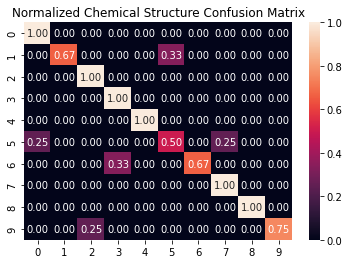

In [56]:
path = '/home/jovyan/Tomics-CP-Chem-MoA/01_CStructure_Models/saved_confusion_matrices'
conf_matrix(path, CStructure_latest)

In [ ]:
# Lists of paths of models that are important with relevant info given time they were created


# CStructure-CP Model: Feature Extraction



/home/jovyan/Tomics-CP-Chem-MoA/03_Global_CStructure_CP_Models/saved_images/loss_train_val21_12_2022-08:51:10.png


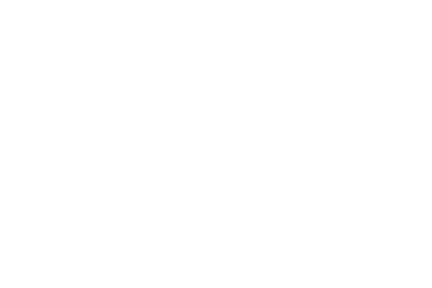

In [62]:
path = '/home/jovyan/Tomics-CP-Chem-MoA/03_Global_CStructure_CP_Models/saved_images/loss*'
display_loss(path, CP_latest)


/home/jovyan/Tomics-CP-Chem-MoA/03_Global_CStructure_CP_Models/saved_images/acc_train_val21_12_2022-08:51:10.png


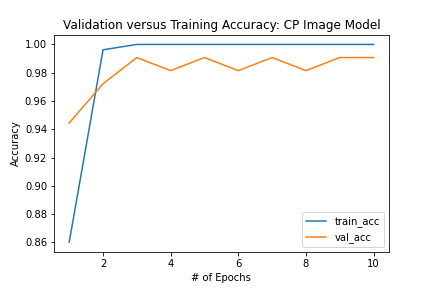

In [63]:
path = '/home/jovyan/Tomics-CP-Chem-MoA/03_Global_CStructure_CP_Models/saved_images/acc*'
display_acc(path, CP_latest)

In [64]:
path= '/home/jovyan/Tomics-CP-Chem-MoA/03_Global_CStructure_CP_Models/saved_models'
state = load_state(path, CP_latest)
b = state['valid_loss']
b

['fine_tuning', 'feature_extraction', 'CS_CP_least_loss_model']
/home/jovyan/Tomics-CP-Chem-MoA/03_Global_CStructure_CP_Models/saved_models/CS_CP_least_loss_model


0.032031136681325734

In [65]:
path = '/home/jovyan/Tomics-CP-Chem-MoA/03_Global_CStructure_CP_Models/saved_classification_reports'
classif_report(path, CP_latest)

['fine_tuning', 'feature_extraction', '19_12_2022-17:14:04_classif_report.txt', '19_12_2022-17:19:14_classif_report.txt', '20_12_2022-08:16:04_classif_report.txt', '20_12_2022-09:57:35_classif_report.txt', '20_12_2022-10:04:36_classif_report.txt', '20_12_2022-10:23:08_classif_report.txt', '20_12_2022-12:35:59_classif_report.txt', '21_12_2022-08:51:10_classif_report.txt']
/home/jovyan/Tomics-CP-Chem-MoA/03_Global_CStructure_CP_Models/saved_classification_reports/21_12_2022-08:51:10_classif_report.txt
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.79      0.88        14
           2       0.44      0.67      0.53         6
           3       0.33      0.75      0.46         4
           4       1.00      1.00      1.00        14
           5       0.80      0.80      0.80        15
           6       1.00      0.82      0.90        11
           7       0.89      0.73      0.80        11
        

['fine_tuning', 'feature_extraction', '19_12_2022-17:14:04_confusion_matrix.npy', '19_12_2022-17:19:14_confusion_matrix.npy', '20_12_2022-08:16:04_confusion_matrix.npy', '20_12_2022-09:57:35_confusion_matrix.npy', '20_12_2022-10:04:36_confusion_matrix.npy', '20_12_2022-10:23:08_confusion_matrix.npy', '20_12_2022-12:35:59_confusion_matrix.npy', '21_12_2022-08:51:10_confusion_matrix.npy']
/home/jovyan/Tomics-CP-Chem-MoA/03_Global_CStructure_CP_Models/saved_confusion_matrices/21_12_2022-08:51:10_confusion_matrix.npy
[Text(0.5, 1.0, 'Normalized Chemical Structure Confusion Matrix')]


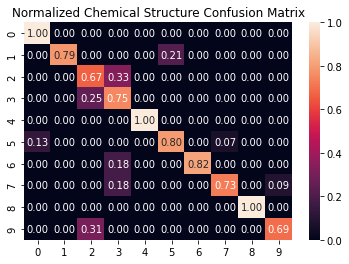

In [66]:
path = '/home/jovyan/Tomics-CP-Chem-MoA/03_Global_CStructure_CP_Models/saved_confusion_matrices'
conf_matrix(path, CP_latest)

# CStructure-CP Model: Fine Tuning

/home/jovyan/Tomics-CP-Chem-MoA/02_CP_Models/saved_images/acc_train_val_20_12_2022-12:39:50.png


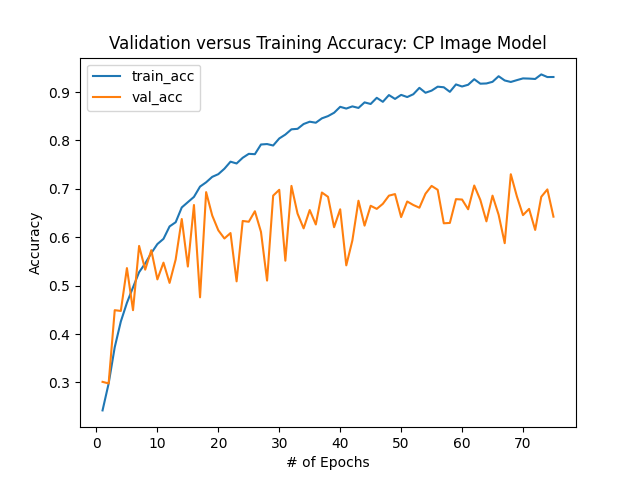

In [61]:
path = '/home/jovyan/Tomics-CP-Chem-MoA/02_CP_Models/saved_images/acc*'
display_acc(path, CP_latest)

In [52]:
path= '/home/jovyan/Tomics-CP-Chem-MoA/02_CP_Models/saved_models'
state = load_state(path, CP_latest)
b = state['valid_loss']
b

/home/jovyan/Tomics-CP-Chem-MoA/02_CP_Models/saved_models/CP_least_loss_model


12.440389528870583

In [53]:
path = '/home/jovyan/Tomics-CP-Chem-MoA/02_CP_Models/saved_classification_reports'
classif_report(path, CP_latest)

/home/jovyan/Tomics-CP-Chem-MoA/02_CP_Models/saved_classification_reports/14_12_2022-11:31:00_classif_report.txt
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.88      0.93         8
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         6
           4       0.94      1.00      0.97        16
           5       1.00      1.00      1.00        18
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00         4

    accuracy                           0.99        98
   macro avg       0.99      0.99      0.99        98
weighted avg       0.99      0.99      0.99        98



/home/jovyan/Tomics-CP-Chem-MoA/02_CP_Models/saved_confusion_matrices/14_12_2022-11:31:00_confusion_matrix.npy
[Text(0.5, 1.0, 'Normalized Chemical Structure Confusion Matrix')]


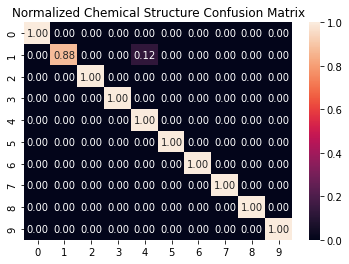

In [54]:
path = '/home/jovyan/Tomics-CP-Chem-MoA/02_CP_Models/saved_confusion_matrices'
conf_matrix(path, CP_latest)